In [1]:
from math import *
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

4. Compressed Sensing

(i) First generation of random matrices and vectors:

In [2]:
# Generate a random matrix, for which each entry is an iid random variable 
# drawn from the standard normal distribution

def A(m, n):
    A = np.array([[np.random.normal() for i in range(n)] for j in range(m)])
    return A

# Or directly use 
# A = np.random.randn(m, n)

In [3]:
def x_star(n, s):
    x_star = np.zeros(n)
    for i in range(s):
        j = np.random.random_integers(0, n-1)
        while x_star[j] != 0:
            j = np.random.random_integers(0, n-1)
        x_star[j] = 1
    return(x_star)

# Or use np.random.shuffle ?
#def x_star(n, s):
#    x_star = np.zeros(n)
#    for i in range(s):
#        x_star[i] = 1
#    x_star = np.random.shuffle(x_star)
#    return(x_star)

(iii) Optimization problem and result showing

In [4]:
# Matrix of successes
M_s  = [[0 for i in range(100)] for j in range(100)]
eps  = 1e-4

# Problem data.
n = 100
for m in range(1, 101):
    for s in range(1,101):
        success = 0
        for i in range(5):
            # Variables
            A_      = A(m, n)
            x_star_ = x_star(n, s)
            y_      = A_ @ x_star_
            c_      = np.array([1 for i in range(n)])
            # Construct the problem
            x_ = cp.Variable(n)
            objective = cp.Minimize(cp.norm1(x_))
            constraints = [A_ @ x_ == y_]
            prob = cp.Problem(objective, constraints)
            # Solve
            result    = prob.solve()
            x_chap    = x_.value
            condition = (np.transpose(x_chap - x_star_) @ (x_chap - x_star_)) / (np.transpose(x_star_) @ x_star_)
            if (condition <= eps):
                success +=1
        M_s[m-1][s-1] = success/5

C:\Users\cecil\AppData\Local\Temp\ipykernel_24944\2662631904.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  j = np.random.random_integers(0, n-1)
C:\Users\cecil\AppData\Local\Temp\ipykernel_24944\2662631904.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 99 + 1) instead
  j = np.random.random_integers(0, n-1)


In [5]:
print(M_s)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

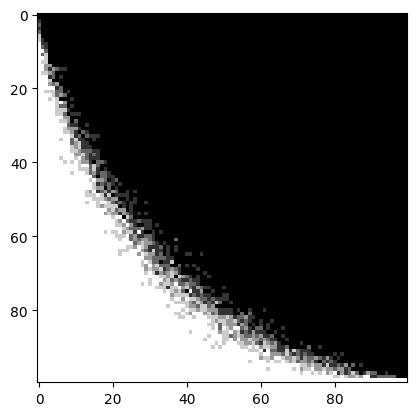

In [7]:
plt.imshow(M_s, cmap='gray')
plt.show()

We indeed observe the curve. If m and s are too low the number of successes will be overwhelmingly low and conversely the number of successes will be overwhelmingly high. This 'limit' curve correspond to somthing as: $m+s=100$, more or less.